## Sklearn Tutorial Text Classification

### Preparing Data

In [40]:
import pandas as pd 


In [41]:
data = pd.read_csv (r"C:\Users\Cristina\Desktop\IMDB Dataset.csv")

In [42]:
data.shape

(50000, 2)

In [45]:
data.describe().transpose()

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


In [7]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


####  Read 10.000 Rows to train the dataset

In [8]:
data_positive = data[data["sentiment"]== "positive"][:9000]
data_negative = data[data["sentiment"]== "negative"][:1000]
data_review_unbalanced = pd.concat([data_positive,data_negative])
data_review_unbalanced

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [9]:
data_review_unbalanced.value_counts("sentiment")

sentiment
positive    9000
negative    1000
dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler()
data_review_balanced,data_review_balanced["sentiment"] = rus.fit_resample(data_review_unbalanced[["review"]],
                                                                          data_review_unbalanced["sentiment"])

In [11]:
data_review_balanced

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,"When in 1982, ""The Thing"" came out to theaters...",positive
1996,It is clear this film's value far supersedes t...,positive
1997,I was probably one of the few Australians not ...,positive
1998,"""North & South"" the television mini-series is ...",positive


In [12]:
data_review_balanced.value_counts(["sentiment"])

sentiment
negative     1000
positive     1000
dtype: int64

### Imbalaced Classes 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

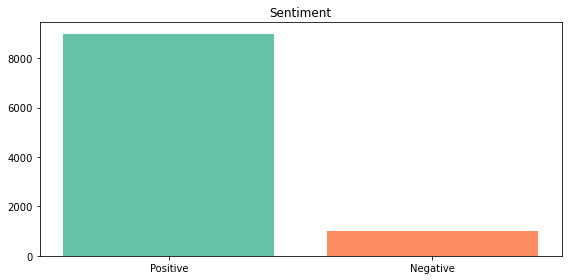

In [14]:
colors = sns.color_palette("Set2")
plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=data_review_unbalanced.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()


### Splitting data into train and test

In [15]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(data_review_balanced, test_size= 0.33, random_state=42)
X_train, y_train  = train["review"], train["sentiment"]
X_test, y_test  = test["review"], test["sentiment"]

####  Transform the dataset into vectors (Bag of Words)  Two Options , two Examples. 

* CountVectorizer 
* Tfidf 

#### CountVectorizer 

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names())
df_dtm                               

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


Tfidf ( term frecuency - inverse document frencuency ) 

In [17]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]
df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words = "english")
tfidf_matrix = tfidf.fit_transform(df["text"])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(),index=df["review"].values, columns= tfidf.get_feature_names())
df_dtm

,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


#### Use the second method 

##### Transform data text to numeric 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")
X_train_vector = tfidf.fit_transform(X_train)

X_test_vector = tfidf.transform(X_test)

In [19]:
X_train_vector

<1340x20094 sparse matrix of type '<class 'numpy.float64'>'
	with 114525 stored elements in Compressed Sparse Row format>

## Training Model selection ML

#### Supervised learning Regresion numeric output , Classification discreet output  
Input : review 
Output : sentiment 

### Support Vector Machines(SVM)

In [20]:
from sklearn.svm import SVC 

svc = SVC(kernel = "linear")
svc.fit(X_train_vector, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 ### Testing 

In [31]:
print(svc.predict(tfidf.transform(["A excellent movie"])))
print(svc.predict(tfidf.transform(["I did not like a movie"])))
print(svc.predict(tfidf.transform(["I liked the movie, it's great"])))


['positive']
['negative']
['positive']


### Decision tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_vector, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Naive Bayes 

In [34]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(X_train_vector.toarray(),y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_vector,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Models Evaluate

#### Model Score ( Accuracy ) 

In [43]:
print(svc.score(X_test_vector, y_test))
print(dec_tree.score(X_test_vector, y_test))
print(gnb.score(X_test_vector.toarray(), y_test))
print(lr.score(X_test_vector, y_test)) 

0.8166666666666667
0.6712121212121213
0.6303030303030303
0.8363636363636363


####  F1 Score

In [44]:
from sklearn.metrics import f1_score 
f1_score(y_test,lr.predict(X_test_vector), labels= ["positive","negative"], average= None)

array([0.84023669, 0.83229814])

#### Classification Report

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr.predict(X_test_vector), labels= ["positive","negative"]))

              precision    recall  f1-score   support

    positive       0.83      0.85      0.84       335
    negative       0.84      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



### Confusion Matrix 

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,lr.predict(X_test_vector), 
                 labels= ["positive","negative"])

array([[284,  51],
       [ 57, 268]], dtype=int64)

### Model Optimization

 #### GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[1,4,8,16,32], "kernel":["linear", "rbf"]}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters,cv= 5)
svc_grid.fit(X_train_vector, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
{'C': 1, 'kernel': 'linear'}


In [53]:
print(svc_grid.best_score_)

0.8395522388059702
